# Task 3: Approximating nonlinear vector fields

In [1]:
# Imports
from sw.vector_approx import *
from sw.function_approx import *
from sw.plotting import *
from scipy.linalg import lstsq
from scipy.integrate import solve_ivp

## Download data sets

In [2]:
X0 = np.loadtxt("datasets/nonlinear_vectorfield_data_x0.txt")
X1 = np.loadtxt("datasets/nonlinear_vectorfield_data_x1.txt")

x00, x01 = X0.T
x10, x11 = X1.T

ss = [-4.5,4.5]

## Visualization: Scatter- and phase plot

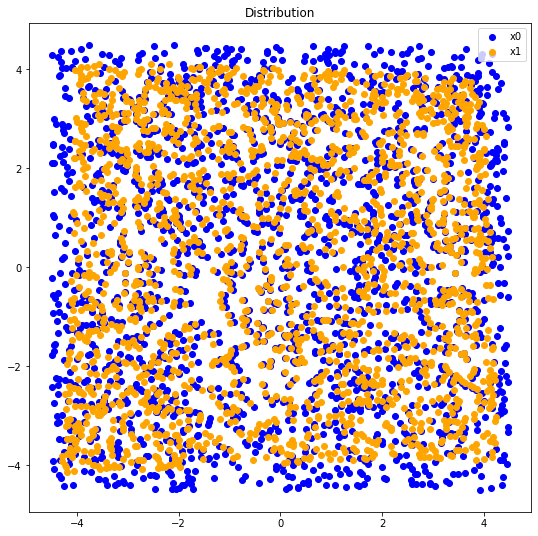

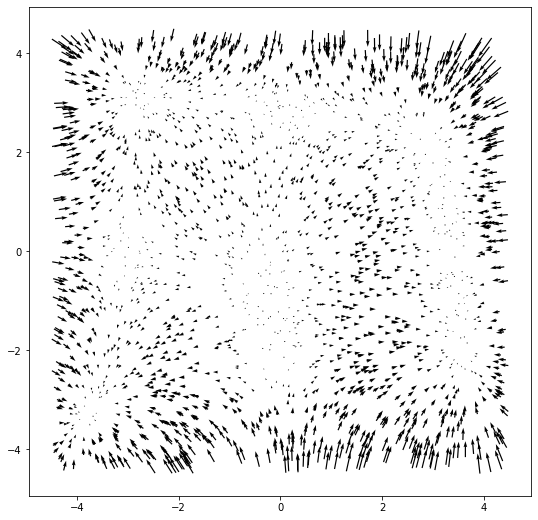

In [35]:
fig = plt.figure(figsize=(9,9))
plot_scatter(X0[:,0],X0[:,1],'blue',"x0")
plot_scatter(X1[:,0],X1[:,1],'orange',"x1")
plot_spesifics(fig,title="Distribution")

U = x10-x00
V = x11-x01

fig = plt.figure(figsize=(9,9))
plt.quiver(x00,x01,U,V)

## Linear system approximation:

<img src="https://latex.codecogs.com/svg.image?\frac{d}{d&space;t}&space;\psi(t,&space;x)&space;\approx&space;\frac{x_{1}-x_{0}}{\Delta&space;t}&space;=&space;A&space;x" title="\frac{d}{d t} \psi(t, x) \approx \frac{x_{1}-x_{0}}{\Delta t} = A x" />

In [ ]:
# Examining accuracy: 
dt_array = np.linspace(0.1,0.7,10)
mse = optimal_dt(X0,X1,dt_array)

fig = plt.figure()
plot_scatter(dt_array,mse,'orange',"mse")
plot_spesifics(fig,x_lab="dt",y_lab="MSE",title="MSE for each dt")

# Using optimal dt to approximate the system:
dt = 0.3
A = least_squares_vector(X0,X1,dt)
print(A)
phase_portrait([2,0],5,1,A,4.5)

x1 = forecast_linear_system(A,X0,dt)
mse = np.mean(np.square(x1-X1))
    
fig = plt.figure(figsize=(9,9))
plot_scatter(X1[:,0],X1[:,1],'orange',"x1")
plot_scatter(x1[:,0],x1[:,1],'green',"approx")
plot_spesifics(fig,x_lab="x",y_lab="y",title="Comparing x1 data set with approximation, MSE = "+str(round(mse,4)))


## Nonlinear system approximation using rbf on two dimensional output space 

In [76]:
epsilon = 0.05
L = 500

In [77]:
c0, approx0, _ = rbf_approx_vector(x00,x10,L,epsilon,ss)
c1, approx1, _ = rbf_approx_vector(x01,x11,L,epsilon,ss)

x_hat = np.vstack([approx0,approx1]).T
print(np.mean(np.square(x_hat-X1)))

0.003085584263428176


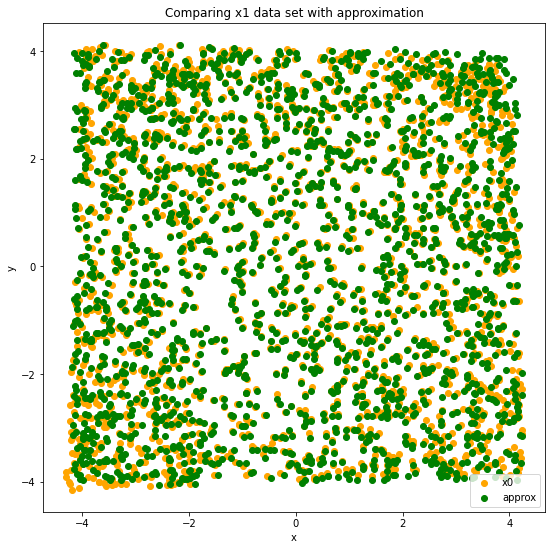

In [78]:
fig = plt.figure(figsize=(9,9))
plot_scatter(X1[:,0],X1[:,1],'orange',"x0")
plot_scatter(approx0,approx1,'green',"approx")
plot_spesifics(fig,x_lab="x",y_lab="y",title="Comparing x1 data set with approximation")

## Forcasting the system using the approximation

In [ ]:
C = np.vstack([c0,c1])
X = np.vstack([x00,x01])

dt = 1
num = 1000
solutions = np.zeros([num,2])

for i in range(num):
    sol = solve_ivp(rbf_system,[0,dt],X[:,i],args=[C,epsilon,X0])
    solutions[i,:] = sol.y[:,-1]


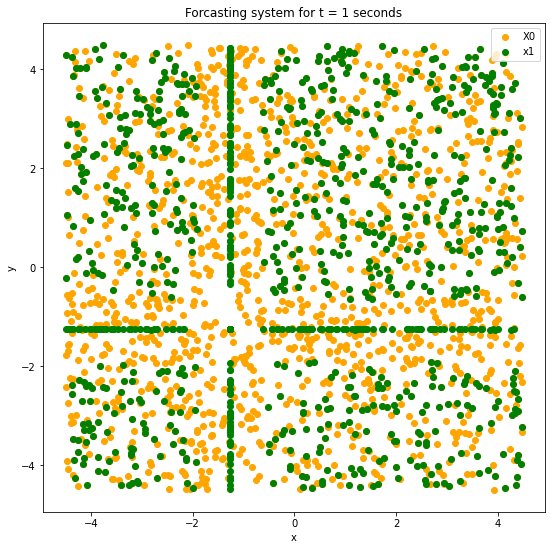

In [83]:
fig = plt.figure(figsize=(9,9))
plot_scatter(X0[:,0],X0[:,1],'orange',"X0",xlim=[-4.5,4.5],ylim=[-4.5,4.5])
plot_scatter(solutions[:,0],solutions[:,1],'green',"x1",xlim=[-4.5,4.5],ylim=[-4.5,4.5])
plot_spesifics(fig,x_lab="x",y_lab="y",title="Forcasting system for t = "+str(dt)+" seconds")